C:\Users\Kang ChanHyuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kang ChanHyuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kang ChanHyuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

Train on 3642 samples, validate on 911 samples
Epoch 1/100
3642/3642 [==============================] - 7s 2ms/step - loss: 12.3744 - acc: 2.7457e-04 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 2/100
3642/3642 [==============================] - 3s 860us/step - loss: 0.0057 - acc: 2.7457e-04 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 3/100
3642/3642 [==============================] - 4s 1ms/step - loss: 0.0047 - acc: 5.4915e-04 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 4/100
3642/3642 [==============================] - 3s 848us/step - loss: 0.0038 - acc: 2.7457e-04 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 5/100
3642/3642 [==============================] - 4s 1ms/step - loss: 0.0040 - acc: 5.4915e-04 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 6/100
3642/3642 [==============================] - 3s 867us/step - loss: 0.0041 - acc: 5.4915e-04 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 7/100
3642/3642 [==============================] - 4s 999us/step - loss: 0.0035 - 

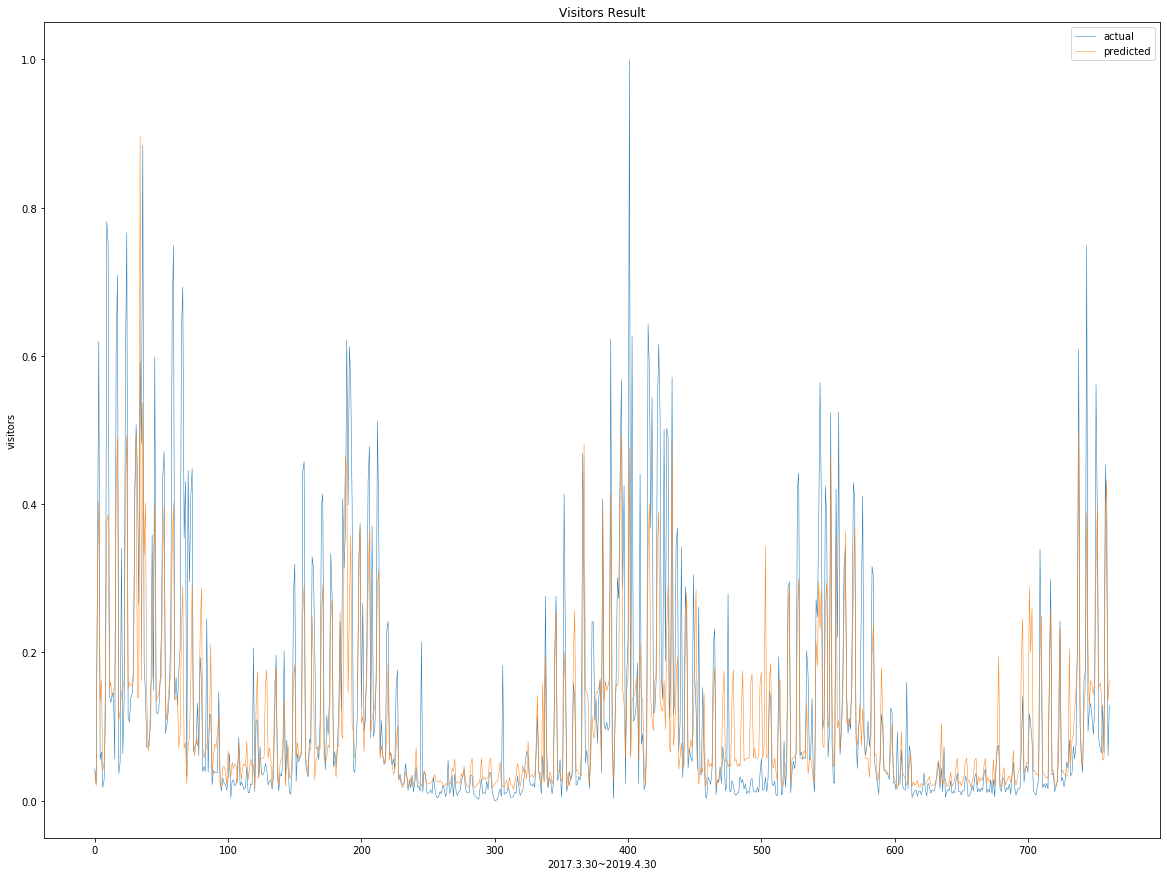

In [87]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
 
    
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(Nh_l[0], activation='relu',input_shape=(Nin,), name='Hidden-1'))
        # Dropout 확률을 정한다.
        # Dropout : 랜덤으로 몇개의 노드를 비활성화 한다.(오버피팅 방지)
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nh_l[2], activation='relu', name='Hidden-3'))
        self.add(layers.Dropout(Pd_l[2]))
        
        self.add(layers.Dense(Nout))
        self.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
        
# 데이터 정리
def Data_func():
    df = pd.read_csv('SeoulGrandPark.csv', engine = 'python')    
    
    df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)#날짜 column생성
    # print(df.head())

    df = df.set_index('날짜') 
    # print(df.head()) 
    # df.plot()

    split_date_last = '2016-12-17'
    split_date_start = '2017-3-30'

    train = df.loc[:split_date_last]
    test = df.loc[split_date_start:]
    # print(train.head())

    train['일계'] = train['일계'].str.replace(',', '')
    test['일계'] = test['일계'].str.replace(',', '')

    train['일계'] = train['일계'].astype('float')
    test['일계'] = test['일계'].astype('float')
    
    train_df = pd.DataFrame(train)
    test_df = pd.DataFrame(test)
    #print(train_df)
    
    X_train = train_df.drop(['일계', '년도', '일'], axis=1)
    y_train = train_df[['일계']]
    X_test = test_df.drop(['일계', '년도', '일'], axis=1)
    y_test = test_df[['일계']]
    #print(X_train)
#     print(y_train)
    
    #one-hot-encoding
    X_train = pd.get_dummies(X_train, columns=['요일', '월'])
    X_test = pd.get_dummies(X_test, columns=['요일', '월'])
    #print(test)
    
    sc = MinMaxScaler()

    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.fit_transform(X_test)
    y_train_sc = sc.fit_transform(y_train)
    y_test_sc = sc.fit_transform(y_test)
    #print(pd.DataFrame(X_train_sc))
    #print(X_train_sc.shape)
    
#     X_train_t = X_train.reshape(X_train.shape[0], day, 1)
#     X_test_t = X_test.reshape(X_test.shape[0], day, 1)

    #print('test개수: ', len(y_test))
    
    return (X_train_sc, y_train_sc), (X_test_sc, y_test_sc)
 
# 모델 테스팅
def main():
    Nh_l = [2000, 1000, 1000]
    Pd_l = [0, 0, 0, 0]
    number_of_class = 1
    Nout = number_of_class
 
    (X_train, Y_train), (X_test, Y_test) = Data_func()
  
    early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=50, validation_split = 0.2, callbacks=[early_stop], verbose = 1)
    
    plt.figure(figsize=(20,15))
    plt.rcParams['lines.linewidth'] = 0.5
    plt.title('Visitors Result')
    plt.xlabel('2017.3.30~2019.4.30')
    plt.ylabel('visitors')
    plt.plot(Y_test, label='actual')
    Y_pred = model.predict(X_test)
    plt.plot(Y_pred, label='predicted')
    plt.legend()
    plt.show()
 
if __name__ == '__main__':
    main()
    